In [1]:
import matplotlib.pyplot as plt
import numpy as np 

In [7]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
        
    def pull(self):
        return np.random.randn() + self.m
        
    def update(self, x):
        self.N += 1
        self.mean = self.mean + 1.0 / self.N * (x - self.mean)

In [8]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    
    data = np.empty(N)
    
    for i in range(N):
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        data[i] = x
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    return cumulative_average

In [9]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

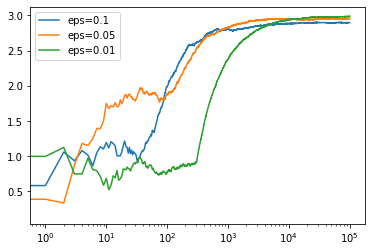

In [10]:
plt.plot(c_1, label="eps=0.1")
plt.plot(c_05, label="eps=0.05")
plt.plot(c_01, label="eps=0.01")
plt.legend()
plt.xscale('log')

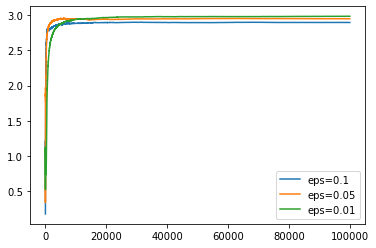

In [11]:
plt.plot(c_1, label="eps=0.1")
plt.plot(c_05, label="eps=0.05")
plt.plot(c_01, label="eps=0.01")
plt.legend()